Opening Dataset

Importing python librabries such as pandas, numpy, datetime,sklearn and matplotlib in the block of code as well as pulling the Dataset into a Dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
from datetime import datetime
from sklearn import*
import pandas_profiling as pp
%matplotlib inline

colNames=["Year",
         "Crop Pot",
         "GNP",
         "GDP",
         "Popul Change",
         "CO2 E",
         "Agri Land",
         "Yearly Rain",
         "Exports",
         "Imports",
         "Fert Consumption"
        ]
        
data = pd.read_excel(r"C:\Users\Azees Fetuga\Desktop\DA Project\Clustered DataSet (version 1).xlsb.xlsx",index_col='Year',names=colNames)
print("Lenght of Data:" ,len(data))
print()
print(data.to_markdown(tablefmt="grid"))
print()
print(data.describe().to_markdown(tablefmt="grid"))
data.shape

Lenght of Data: 35

+--------+------------+----------+----------+----------------+-----------+-------------+---------------+---------------+---------------+--------------------+
|   Year |   Crop Pot |      GNP |      GDP |   Popul Change |     CO2 E |   Agri Land |   Yearly Rain |       Exports |       Imports |   Fert Consumption |
+========+============+==========+==========+================+===========+=============+===============+===============+===============+====================+
|   1985 |       32.1 |  19.9111 |  6018.94 |        0.16007 |   7.55355 |     82.8132 |       95.6    | nan           | nan           |            nan     |
+--------+------------+----------+----------+----------------+-----------+-------------+---------------+---------------+---------------+--------------------+
|   1986 |       29.5 |  22.557  |  8121.89 |        0.04544 |   8.05878 |     82.6535 |       90.75   | nan           | nan           |            nan     |
+--------+------------+---------

(35, 10)

Formatting Values

Plotting Data

Column of years indexed into the dataframe and then each column in data set is individual ploted on a line graph.

Commets on graphs:
Crop production: Experience a downwards trend in within the time frame, negative slope
GNP: Upward trend throughout the e

DatetimeIndex(['1985-01-01', '1986-01-01', '1987-01-01', '1988-01-01',
               '1989-01-01', '1990-01-01', '1991-01-01', '1992-01-01',
               '1993-01-01', '1994-01-01', '1995-01-01', '1996-01-01',
               '1997-01-01', '1998-01-01', '1999-01-01', '2000-01-01',
               '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01',
               '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01',
               '2017-01-01', '2018-01-01', '2019-01-01'],
              dtype='datetime64[ns]', freq=None)



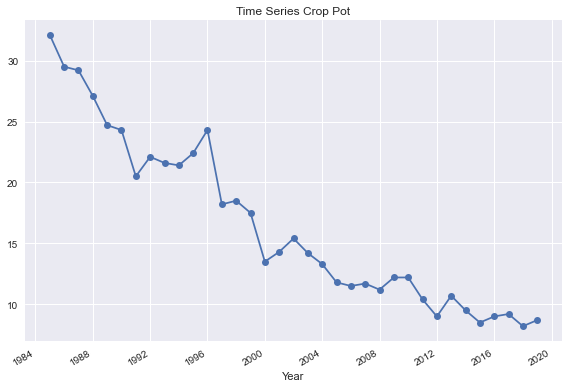

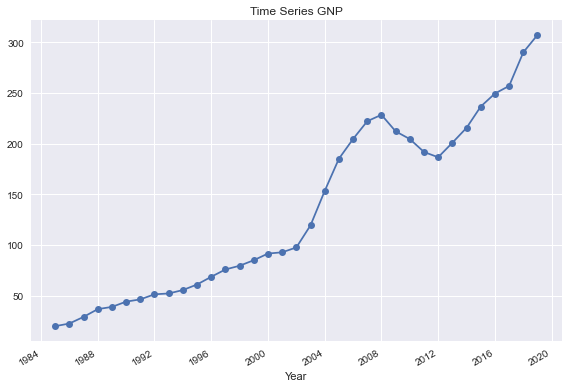

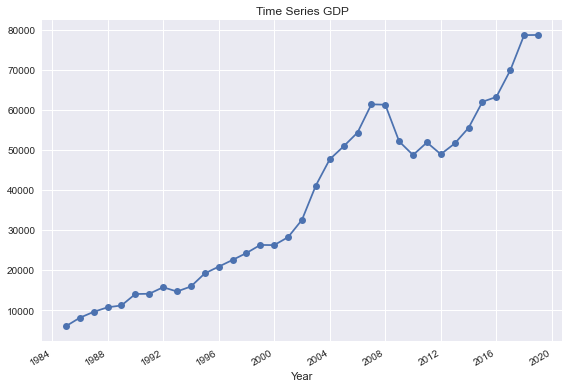

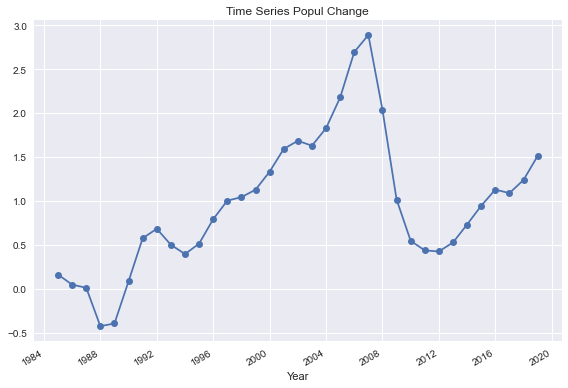

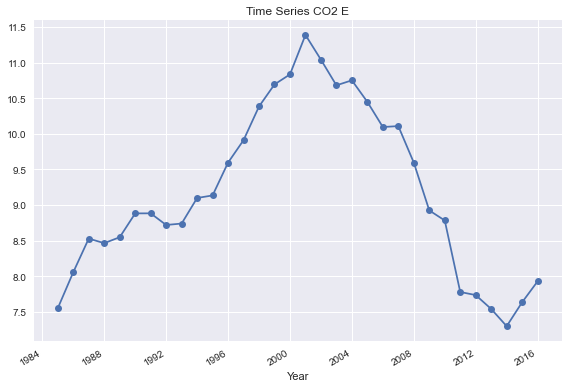

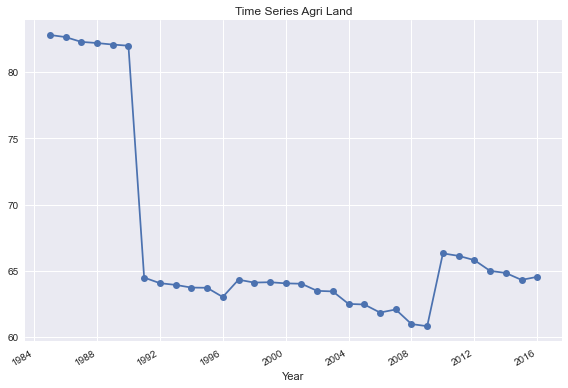

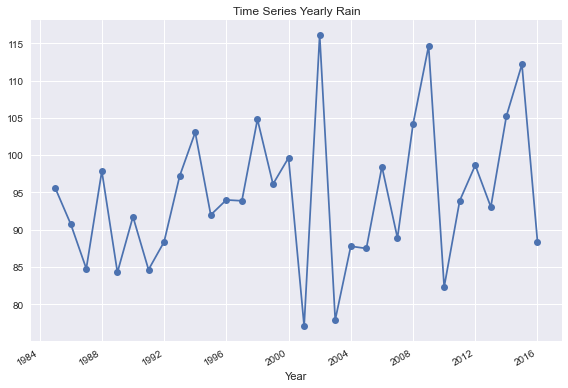

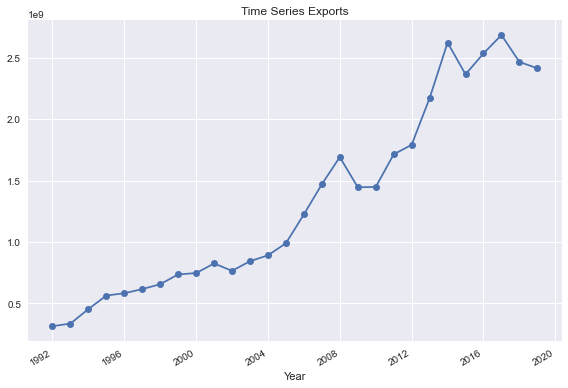

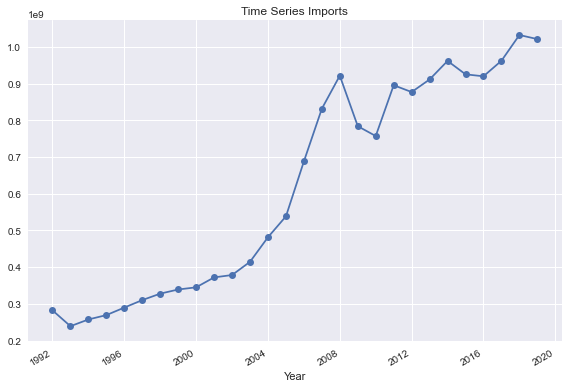

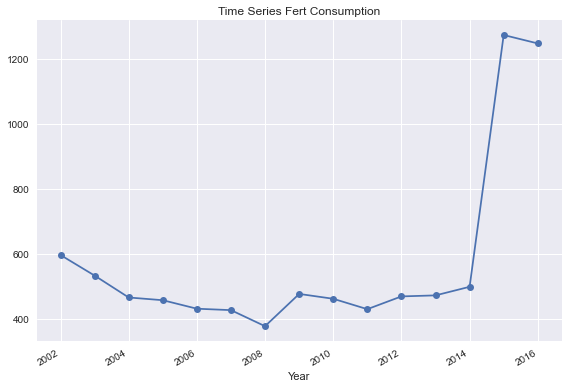

In [2]:
plt.style.use('seaborn')
dates = pd.to_datetime(list(data.index),format="%Y")
print(dates)
print()

colNames2=["Crop Pot",
         "GNP",
         "GDP",
         "Popul Change",
         "CO2 E",
         "Agri Land",
         "Yearly Rain",
         "Exports",
         "Imports",
         "Fert Consumption"
        ]

def plotSeries(Name):
    plt.plot_date(dates, data[Name],linestyle ='solid')
    plt.gcf().autofmt_xdate()
    date_format = mpl_dates.DateFormatter('%Y')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.title("Time Series "+ Name)
    plt.xlabel("Year")
    plt.tight_layout()
    plt.show()

for attribute in colNames2:
    plotSeries(attribute)

Searching for Missing Data

In [3]:
print(data.isnull().any().to_markdown(tablefmt="grid"), )
print()
print(data.isna().any().to_markdown(tablefmt="grid"))
print()
print(data.isnull().sum().to_markdown(tablefmt="grid"))
print()
print(data.isna().sum().to_markdown(tablefmt="grid"))
print()
print("Total Number of Null data in dataset:" , data.isnull().sum().sum())
print("Total Number of NA data in dataset:" , data.isnull().sum().sum())

+------------------+-----+
|                  |   0 |
+==================+=====+
| Crop Pot         |   0 |
+------------------+-----+
| GNP              |   0 |
+------------------+-----+
| GDP              |   0 |
+------------------+-----+
| Popul Change     |   0 |
+------------------+-----+
| CO2 E            |   1 |
+------------------+-----+
| Agri Land        |   1 |
+------------------+-----+
| Yearly Rain      |   1 |
+------------------+-----+
| Exports          |   1 |
+------------------+-----+
| Imports          |   1 |
+------------------+-----+
| Fert Consumption |   1 |
+------------------+-----+

+------------------+-----+
|                  |   0 |
+==================+=====+
| Crop Pot         |   0 |
+------------------+-----+
| GNP              |   0 |
+------------------+-----+
| GDP              |   0 |
+------------------+-----+
| Popul Change     |   0 |
+------------------+-----+
| CO2 E            |   1 |
+------------------+-----+
| Agri Land        |   1 |


Marking and Imputing Missing and NA Data

In [4]:
data = data.mask(data.isna(), np.NaN)
data = data.drop(columns=["Fert Consumption"])
print(data.to_markdown(tablefmt="grid"))
print()
print(data.shape)
print()
data.dropna(inplace=True)
print(data.to_markdown(tablefmt="grid"))
print(data.shape)

+--------+------------+----------+----------+----------------+-----------+-------------+---------------+---------------+---------------+
|   Year |   Crop Pot |      GNP |      GDP |   Popul Change |     CO2 E |   Agri Land |   Yearly Rain |       Exports |       Imports |
+========+============+==========+==========+================+===========+=============+===============+===============+===============+
|   1985 |       32.1 |  19.9111 |  6018.94 |        0.16007 |   7.55355 |     82.8132 |       95.6    | nan           | nan           |
+--------+------------+----------+----------+----------------+-----------+-------------+---------------+---------------+---------------+
|   1986 |       29.5 |  22.557  |  8121.89 |        0.04544 |   8.05878 |     82.6535 |       90.75   | nan           | nan           |
+--------+------------+----------+----------+----------------+-----------+-------------+---------------+---------------+---------------+
|   1987 |       29.2 |  29.0866 |  9593.

Data Augmentation:


Filter by Variation

In [5]:
data.var()

Crop Pot        2.310440e+01
GNP             4.878833e+03
GDP             2.859521e+08
Popul Change    5.103731e-01
CO2 E           1.559011e+00
Agri Land       1.989332e+00
Yearly Rain     1.056960e+02
Exports         4.876091e+17
Imports         7.511642e+16
dtype: float64

Looking for Correlations


In [6]:
colNames3=["Crop Pot",
         "GNP",
         "GDP",
         "Popul Change",
         "CO2 E",
         "Agri Land",
         "Yearly Rain",
         "Exports",
         "Imports"
        ]

def correlate(Name):
    print(Name," Correlations")
    for col in colNames3:
        if data[col].corr(data[Name],method="pearson") >= 0.5 and  Name != col and data[col].corr(data[Name],method="pearson")  <= 0.7 :
             print(col, " is Moderately correlated")
        if data[col].corr(data[Name],method="pearson") >= 0.7 and  Name != col :
             print(col, " is Highly correlated")
        if data[col].corr(data[Name],method="pearson")  <= 0.5 and  Name != col :
             print(col, " is Weakly correlated")
    print()

pp.ProfileReport(data).to_notebook_iframe()
print(data.to_markdown(tablefmt="grid"))
print(data.shape)
print(data.corr(method="pearson").to_markdown(tablefmt="grid"))
print()
for attribute in colNames3:
    correlate(attribute)

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]


+--------+------------+----------+---------+----------------+----------+-------------+---------------+-------------+-------------+
|   Year |   Crop Pot |      GNP |     GDP |   Popul Change |    CO2 E |   Agri Land |   Yearly Rain |     Exports |     Imports |
+========+============+==========+=========+================+==========+=============+===============+=============+=============+
|   1992 |       22.1 |  51.3884 | 15733.2 |        0.68226 |  8.72121 |     64.0586 |       88.36   | 3.13098e+08 | 2.82344e+08 |
+--------+------------+----------+---------+----------------+----------+-------------+---------------+-------------+-------------+
|   1993 |       21.6 |  52.2184 | 14674.6 |        0.49984 |  8.7413  |     63.928  |       97.19   | 3.34411e+08 | 2.39082e+08 |
+--------+------------+----------+---------+----------------+----------+-------------+---------------+-------------+-------------+
|   1994 |       21.4 |  55.5813 | 15922   |        0.39419 |  9.10013 |     63.724

Data Normalizationing and Standardising 

In [7]:
array  = data.values 
X = array[:,0:8]
Y = array[:,8]

scaler = preprocessing.Normalizer().fit(X)
normalizedX = scaler.transform(X)

normalizedX = pd.DataFrame(normalizedX)
Y = pd.DataFrame(Y)

outData = pd.concat([normalizedX, Y], axis=1, sort=False)
outData.to_csv("DataNorm.csv", header = False, index = False)

array = data.values
X = array[:,0:8]
Y = array[:,8]
scaler = preprocessing.StandardScaler().fit(X)
normalizedX = scaler.transform(X)
normalizedX = pd.DataFrame(normalizedX)
Y = pd.DataFrame(Y)
outData = pd.concat([normalizedX, Y], axis=1, sort=False)
outData.to_csv("DataStand.csv", header = False, index = False)


In [8]:

array = data.values
X = array[:,0:8]
Y = array[:,8]

print(X)

[[2.21000000e+01 5.13883739e+01 1.57332040e+04 6.82260000e-01
  8.72121000e+00 6.40586400e+01 8.83600000e+01 3.13097664e+08]
 [2.16000000e+01 5.22183524e+01 1.46746146e+04 4.99840000e-01
  8.74130000e+00 6.39280000e+01 9.71900000e+01 3.34410720e+08]
 [2.14000000e+01 5.55812566e+01 1.59219748e+04 3.94190000e-01
  9.10013000e+00 6.37247800e+01 1.03050000e+02 4.52461568e+08]
 [2.24000000e+01 6.10627062e+01 1.91814004e+04 5.12700000e-01
  9.13590000e+00 6.37102600e+01 9.19800000e+01 5.62807296e+08]
 [2.43000000e+01 6.86783857e+01 2.08605970e+04 7.91270000e-01
  9.59617000e+00 6.30135000e+01 9.39900000e+01 5.81478656e+08]
 [1.82000000e+01 7.59076325e+01 2.25428108e+04 1.00281000e+00
  9.91162000e+00 6.43199300e+01 9.38700000e+01 6.15422336e+08]
 [1.85000000e+01 7.95826707e+01 2.42632448e+04 1.04308000e+00
  1.03845900e+01 6.41021900e+01 1.04791667e+02 6.55298304e+08]
 [1.75000000e+01 8.50463262e+01 2.62843420e+04 1.12730000e+00
  1.06939900e+01 6.41312200e+01 9.61083333e+01 7.35072192e+08]


MSE 0.2705780212257958
RMSE:  0.5201711460911647
R^2 SCORE: 0.7688724482973991
Coefficients:  [-0.38719664 -0.40410043  0.30072035 -0.57405267 -0.35016532 -0.00547268
  0.02545896 -0.49275808]
Variance score: 0.7688724482973991
Intercept -0.07925912414923554


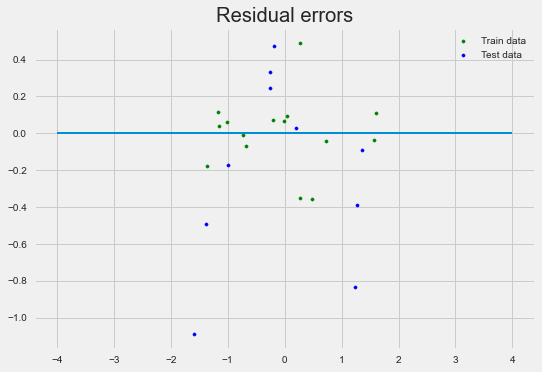

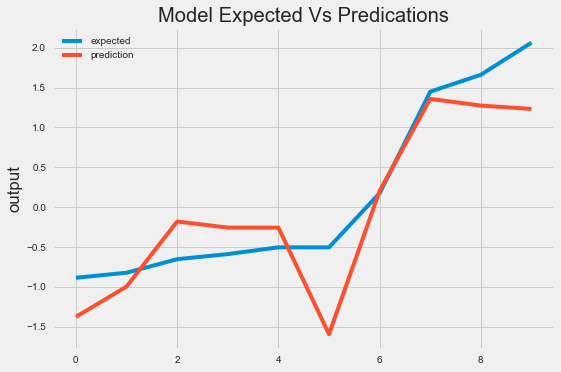

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore

def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.title("Model Accuracy")
    plt.legend()
    plt.show()
 
data['Crop Pot'] = zscore(data['Crop Pot'])
data['GNP'] = zscore(data['GNP'])
data['GDP'] = zscore(data['GDP'])
data['Popul Change'] = zscore(data['Popul Change'])
data['CO2 E'] = zscore(data['CO2 E'])
data['Agri Land'] = zscore(data['Agri Land'])
data['Yearly Rain'] = zscore(data['Yearly Rain'])
data['Exports'] = zscore(data['Exports'])
data['Imports'] = zscore(data['Imports'])


target = data["Crop Pot"]
test = data
test = test.drop(columns=["Crop Pot"])

y = target.values
X = test.values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=1)
modelA = linear_model.LinearRegression()
modelA.fit(x_train, y_train)

pred = modelA.predict(x_test)
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
test_set_r2 = r2_score(y_test, pred)

print("MSE", mean_squared_error(y_test, pred))
print("RMSE: ",test_set_rmse)
print("R^2 SCORE:",test_set_r2)
print('Coefficients: ', modelA.coef_)
print('Variance score: {}'.format(modelA.score(x_test, y_test)))
print("Intercept", modelA.intercept_)



plt.style.use('fivethirtyeight')

plt.scatter(modelA.predict(x_train), modelA.predict(x_train) - y_train,
            color = "green", s = 10, label = 'Train data')

plt.scatter(modelA.predict(x_test), modelA.predict(x_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
    
plt.hlines(y = 0, xmin = -4, xmax = 4, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()





def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.title("Model Expected Vs Predications")
    plt.legend()
    plt.show()

chart_regression(pred.flatten(),y_test.flatten())


OLS (Ordinary Least Square)

In [10]:
import statsmodels.api as sm
X_train = sm.add_constant(x_train)
model = sm.OLS(y_train,X_train).fit()
#Checking if the coef match up with the Linear Model
print(model.params)
model.summary()



[-0.07925912 -0.38719664 -0.40410043  0.30072035 -0.57405267 -0.35016532
 -0.00547268  0.02545896 -0.49275808]
C:\Users\Anaconda\envs\tf\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     15.94
Date:                Thu, 29 Apr 2021   Prob (F-statistic):            0.00164
Time:                        02:36:21   Log-Likelihood:                 3.0720
No. Observations:                  15   AIC:                             11.86
Df Residuals:                       6   BIC:                             18.23
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0793      0.100     -0.790      0.460      -0.325       0.166
x1            -0.3872      1.193     -0.325      0.756      -3.306       2.532
x2            -0.4041      0.800     -0.505      0.632      -2.362       1.554
x3             0.3007      0.319      0.942      0.383      -0.481       1.082
x4            -0.5741      0.226     -2.537      0.044      -1.128      -0.020
x5            -0.3502      0.224     -1.566      0.168      -0.897       0.197
x6            -0.0055      0.119     -0.046      0.965      -0.297       0.286
x7             0.0255      0.390      0.065      0.950      -0.929       0.980
x8            -0.4928      0.484     -1.018      0.348      -1.677       0.692
==============================================================================
Omnibus:                        2.896   Durbin-Watson:                   1.367
Prob(Omnibus):                  0.235   Jarque-Bera (JB):                0.849
Skew:                          -0.251   Prob(JB):                        0.654
Kurtosis:                       4.052   Cond. No.                         39.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Lasso Regression



{'alpha': 0.01}
-0.3533404768587699
MSE 0.20163782182283882
RMSE:  0.4490410023849034
R^2 SCORE: 0.8277611171911587
C:\Users\Anaconda\envs\tf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03499531131418489, tolerance: 0.0009426497143663576
  model = cd_fast.enet_coordinate_descent(
C:\Users\Anaconda\envs\tf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05009489440768409, tolerance: 0.0006534731938767536
  model = cd_fast.enet_coordinate_descent(
C:\Users\Anaconda\envs\tf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012505130478352892, tolerance: 0.0009807180240625822
  model = cd

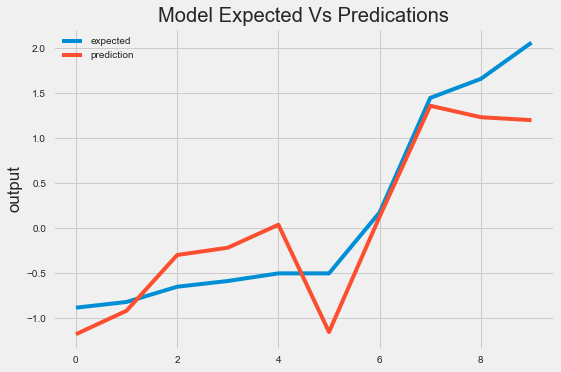

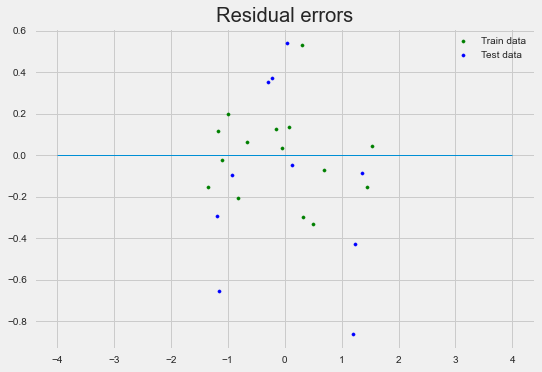



{'alpha': 0.10784585208822295}
-0.2863063893330913
MSE 0.3402109289904087
RMSE:  0.5832760315583083
R^2 SCORE: 0.7093920684178464
C:\Users\Anaconda\envs\tf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002389120026025836, tolerance: 0.0009807180240625822
  model = cd_fast.enet_coordinate_descent(


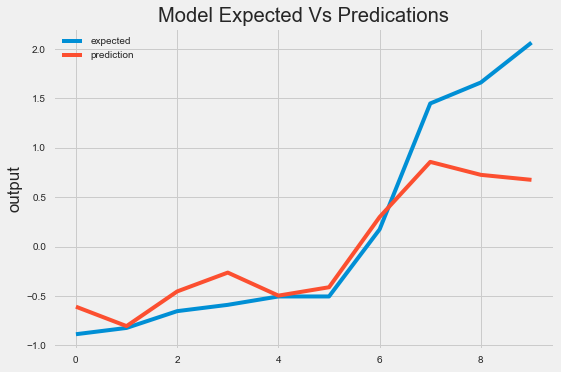

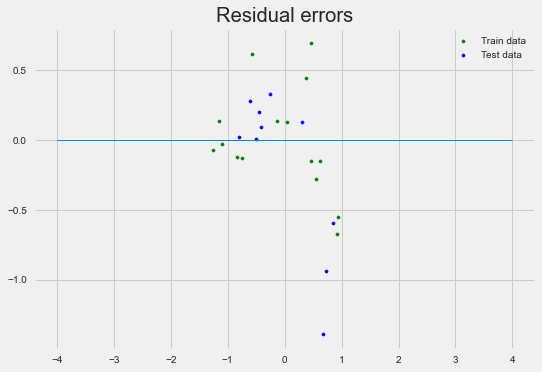

In [11]:
from scipy.stats import uniform 
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV




def evaluate(model, x_test, y_test):
    pred = model.predict(x_test)
    test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
    test_set_r2 = r2_score(y_test, pred)
    print("MSE", mean_squared_error(y_test, pred))
    print("RMSE: ",test_set_rmse)
    print("R^2 SCORE:",test_set_r2)
    chart_regression(pred.flatten(),y_test.flatten())
    plt.style.use('fivethirtyeight')
    plt.scatter(model.predict(x_train), model.predict(x_train) - y_train,
            color = "green", s = 10, label = 'Train data')
    plt.scatter(model.predict(x_test), model.predict(x_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
    plt.hlines(y = 0, xmin = -4, xmax = 4, linewidth = 1)
    plt.legend(loc = 'upper right')
    plt.title("Residual errors")
    plt.show()



lasso=Lasso()

#Grid Search (possible alphas)
parametersA={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressorA=GridSearchCV(lasso,parametersA,scoring='neg_mean_squared_error',cv=4)
lasso_regressorA.fit(x_train, y_train)
print("\n")
print(lasso_regressorA.best_params_)
print(lasso_regressorA.best_score_)
lassoA = lasso_regressorA.best_estimator_
evaluate(lassoA,x_test,y_test)

print("\n")

#Random Search alphas taken from a distribution of the values
parametersB = {'alpha': uniform()}
lasso_regressorB = RandomizedSearchCV(estimator = lasso,scoring ='neg_mean_squared_error', param_distributions = parametersB, n_iter=200, cv= 4 )
lasso_regressorB.fit(x_train, y_train)
print(lasso_regressorB.best_params_)
print(lasso_regressorB.best_score_)
lassoB = lasso_regressorB.best_estimator_
evaluate(lassoB,x_test,y_test)

Ridge Regression

{'alpha': 1}
-0.19776861461542344
MSE 0.18972501136932549
RMSE:  0.4355743465464024
R^2 SCORE: 0.8379370313380067


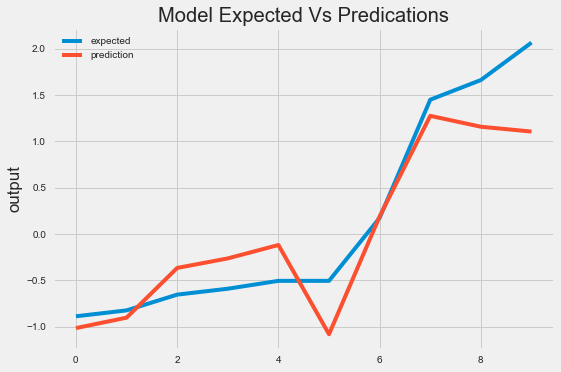

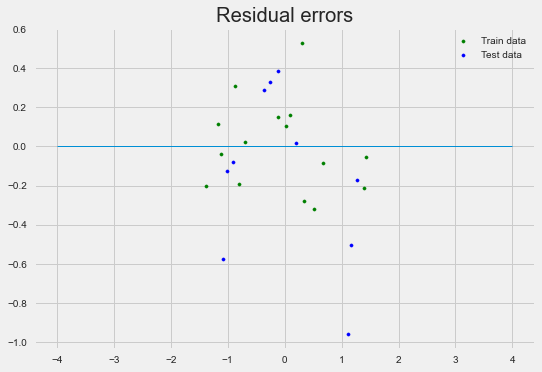



{'alpha': 0.5703535756278262}
-0.1901729105612708
MSE 0.19646900087180436
RMSE:  0.44324823843057104
R^2 SCORE: 0.8321763203410286


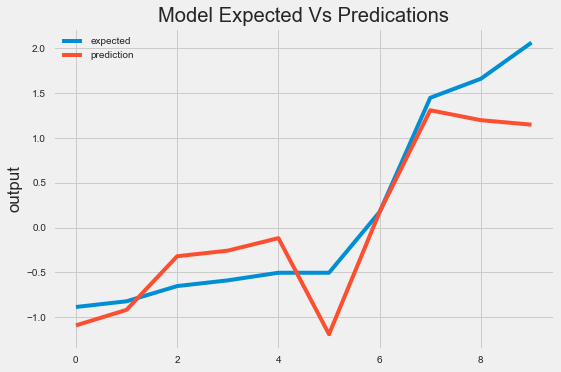

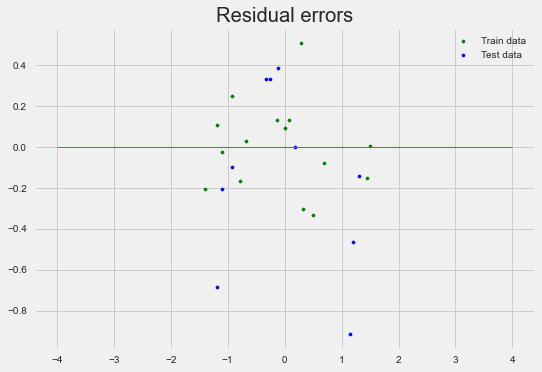

In [12]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parametersA={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressorA=GridSearchCV(ridge,parametersA,scoring='neg_mean_squared_error',cv=4)
ridge_regressorA.fit(x_train, y_train)
print(ridge_regressorA.best_params_)
print(ridge_regressorA.best_score_)
ridgeA = ridge_regressorA.best_estimator_
evaluate(ridgeA,x_test,y_test)

print("\n")

parametersB = {'alpha': uniform()}
ridge_regressorB = RandomizedSearchCV(ridge, param_distributions = parametersB,scoring ='neg_mean_squared_error', n_iter=100, cv=4 )
ridge_regressorB.fit(x_train, y_train)
print(ridge_regressorB.best_params_)
print(ridge_regressorB.best_score_)
ridgeB = ridge_regressorB.best_estimator_
evaluate(ridgeB,x_test,y_test)


Keras Regression

8
Epoch 1/200
1/1 [==============================] - 0s 109ms/step - loss: 0.8696 - val_loss: 1.1996
Epoch 2/200
1/1 [==============================] - 0s 12ms/step - loss: 0.8685 - val_loss: 1.2016
Epoch 3/200
1/1 [==============================] - 0s 13ms/step - loss: 0.8674 - val_loss: 1.2037
Epoch 4/200
1/1 [==============================] - 0s 11ms/step - loss: 0.8665 - val_loss: 1.2058
Epoch 5/200
1/1 [==============================] - 0s 13ms/step - loss: 0.8656 - val_loss: 1.2080
Epoch 6/200
1/1 [==============================] - 0s 12ms/step - loss: 0.8647 - val_loss: 1.2100
Epoch 7/200
1/1 [==============================] - 0s 12ms/step - loss: 0.8637 - val_loss: 1.2119
Epoch 8/200
1/1 [==============================] - 0s 13ms/step - loss: 0.8628 - val_loss: 1.2138
Epoch 9/200
1/1 [==============================] - 0s 14ms/step - loss: 0.8619 - val_loss: 1.2156
Epoch 10/200
1/1 [==============================] - 0s 14ms/step - loss: 0.8610 - val_loss: 1.2173
Epoch 11/200
1/1

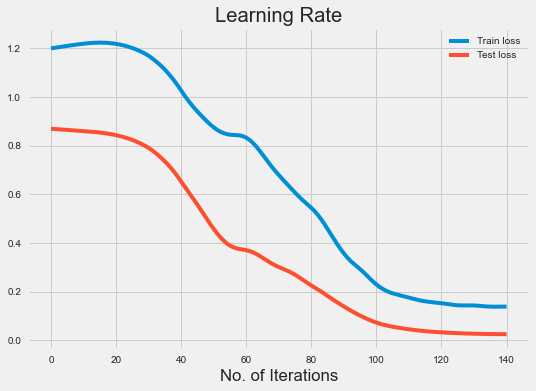

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     15.94
Date:                Thu, 29 Apr 2021   Prob (F-statistic):            0.00164
Time:                        02:36:31   Log-Likelihood:                 3.0720
No. Observations:                  15   AIC:                             11.86
Df Residuals:                       6   BIC:                             18.23
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0793      0.100     -0.790      0.4

In [13]:
##Initial Model
import pandas as pd
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import metrics
import numpy as np
import tensorflow as tf
from ann_visualizer.visualize import ann_viz;

seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

data['Crop Pot'] = zscore(data['Crop Pot'])
data['GNP'] = zscore(data['GNP'])
data['GDP'] = zscore(data['GDP'])
data['Popul Change'] = zscore(data['Popul Change'])
data['CO2 E'] = zscore(data['CO2 E'])
data['Agri Land'] = zscore(data['Agri Land'])
data['Yearly Rain'] = zscore(data['Yearly Rain'])
data['Exports'] = zscore(data['Exports'])
data['Imports'] = zscore(data['Imports'])


y = data["Crop Pot"].values    
x = data.drop(columns=["Crop Pot"]).values


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)
print(x.shape[1])
bias_initializer = tf.keras.initializers.HeNormal()
modelB = Sequential()
modelB.add(Dense(26, input_dim=x.shape[1], kernel_initializer="uniform", activation='relu',use_bias = True,bias_initializer=bias_initializer)) 
modelB.add(Dense(26, kernel_initializer="normal", activation='relu',use_bias = True,bias_initializer=bias_initializer)) 
modelB.add(Dense(26, kernel_initializer="normal", activation='relu'))
modelB.add(Dense(26, kernel_initializer="normal", activation='relu'))
modelB.add(Dense(1)) 
adam = Adam(0.5)
modelB.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto', 
                        restore_best_weights=True)
history = modelB.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=1,epochs=200)

pred = modelB(x_test)
score = metrics.mean_squared_error(pred,y_test)


plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.xlabel("No. of Iterations")
plt.title("Learning Rate")
plt.legend(['Train loss', 'Test loss'], loc='upper right')
plt.show()


ann_viz(modelB,view=False,filename="DNN_Network.png", title="Keras Network")



 

print(model.summary())

Grid Search

MSE: 0.109
MSE: 0.555
MSE: 0.284
MSE: 0.034
MSE: 0.150
MSE: 0.462
MSE: 0.185
MSE: 0.013
MSE: 0.267
MSE: 1.038
MSE: 0.148
MSE: 0.018
MSE: 0.075
MSE: 1.155
MSE: 0.166
MSE: 0.237
MSE: 0.089
MSE: 0.652
MSE: 0.246
MSE: 0.176
MSE: 0.099
MSE: 1.075
MSE: 0.256
MSE: 0.179
MSE: 0.130
MSE: 1.184
MSE: 0.603
MSE: 0.175
MSE: 0.119
MSE: 0.991
MSE: 0.361
MSE: 0.206
MSE: 0.066
MSE: 1.190
MSE: 0.154
MSE: 0.150
MSE: 0.117
MSE: 1.223
MSE: 0.643
MSE: 0.211
MSE: 0.236
MSE: 0.408
MSE: 0.147
MSE: 0.010
MSE: 0.285
MSE: 0.302
MSE: 0.161
MSE: 0.023
MSE: 0.312
MSE: 1.008
MSE: 0.175
MSE: 0.082
MSE: 0.207
MSE: 0.428
MSE: 0.159
MSE: 0.017
MSE: 0.222
MSE: 0.211
MSE: 0.143
MSE: 0.019
MSE: 0.227
MSE: 0.242
MSE: 0.161
MSE: 0.027
MSE: 0.269
MSE: 0.544
MSE: 0.178
MSE: 0.029
MSE: 0.257
MSE: 0.525
MSE: 0.192
MSE: 0.005
MSE: 0.389
MSE: 0.337
MSE: 0.162
MSE: 0.018
MSE: 0.178
MSE: 0.517
MSE: 0.162
MSE: 0.025
MSE: 0.260
MSE: 0.143
MSE: 0.167
MSE: 0.145
MSE: 0.265
MSE: 0.076
MSE: 0.160
MSE: 0.077
MSE: 0.208
MSE: 0.113
MSE: 0.182

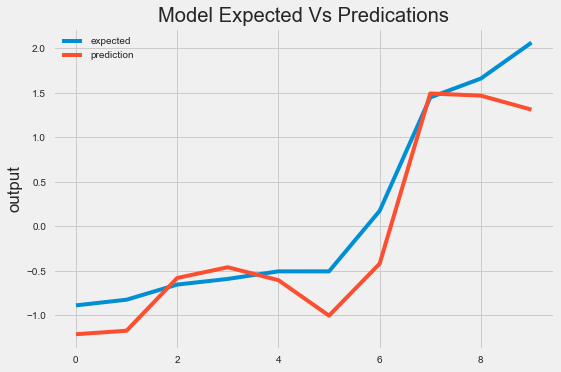

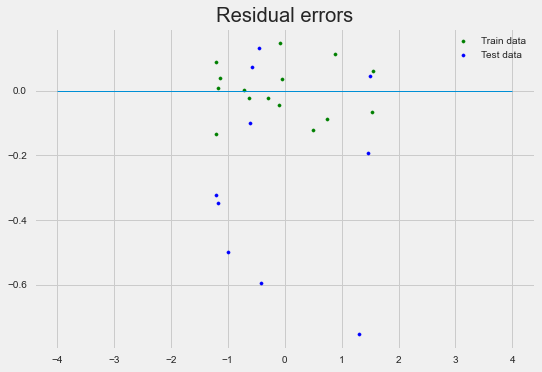

Best: -0.108469 using {'batch_size': 240, 'epochs': 400, 'initIn': 'normal', 'optimizerIn': 'adam'}
-0.245412 (0.200389) with: {'batch_size': 20, 'epochs': 100, 'initIn': 'normal', 'optimizerIn': 'rmsprop'}
-0.202392 (0.162931) with: {'batch_size': 20, 'epochs': 100, 'initIn': 'normal', 'optimizerIn': 'adam'}
-0.367873 (0.396629) with: {'batch_size': 20, 'epochs': 100, 'initIn': 'normal', 'optimizerIn': 'sigmoid'}
-0.407994 (0.435026) with: {'batch_size': 20, 'epochs': 100, 'initIn': 'normal', 'optimizerIn': 'relu'}
-0.290730 (0.215681) with: {'batch_size': 20, 'epochs': 100, 'initIn': 'normal', 'optimizerIn': 'momentum'}
-0.402560 (0.392461) with: {'batch_size': 20, 'epochs': 100, 'initIn': 'uniform', 'optimizerIn': 'rmsprop'}
-0.523018 (0.423732) with: {'batch_size': 20, 'epochs': 100, 'initIn': 'uniform', 'optimizerIn': 'adam'}
-0.419321 (0.341364) with: {'batch_size': 20, 'epochs': 100, 'initIn': 'uniform', 'optimizerIn': 'sigmoid'}
-0.389969 (0.463245) with: {'batch_size': 20, 'ep

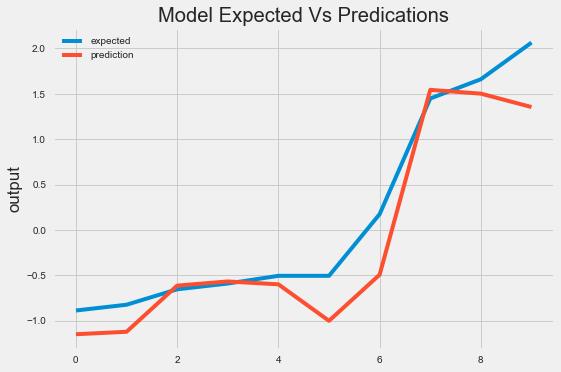

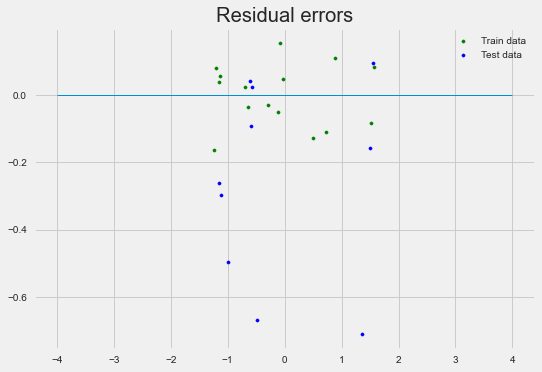

Best: -0.126650 using {'optimizerIn': 'sigmoid', 'initIn': 'normal', 'epochs': 300, 'batch_size': 60}
-0.232057 (0.173821) with: {'optimizerIn': 'relu', 'initIn': 'uniform', 'epochs': 200, 'batch_size': 40}
-0.330332 (0.318271) with: {'optimizerIn': 'rmsprop', 'initIn': 'normal', 'epochs': 100, 'batch_size': 40}
-0.249012 (0.139330) with: {'optimizerIn': 'momentum', 'initIn': 'normal', 'epochs': 400, 'batch_size': 20}
-0.126650 (0.084872) with: {'optimizerIn': 'sigmoid', 'initIn': 'normal', 'epochs': 300, 'batch_size': 60}
-0.132018 (0.063237) with: {'optimizerIn': 'momentum', 'initIn': 'normal', 'epochs': 300, 'batch_size': 240}
-0.164532 (0.095395) with: {'optimizerIn': 'relu', 'initIn': 'uniform', 'epochs': 400, 'batch_size': 240}
-0.241693 (0.144459) with: {'optimizerIn': 'rmsprop', 'initIn': 'uniform', 'epochs': 200, 'batch_size': 60}
-0.378446 (0.356736) with: {'optimizerIn': 'momentum', 'initIn': 'normal', 'epochs': 100, 'batch_size': 20}
-0.227691 (0.138192) with: {'optimizerIn

In [14]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dropout
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from tensorflow.keras.layers import GaussianNoise
from sklearn.model_selection import RandomizedSearchCV

seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)


def MSE(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    print ('MSE: %2.3f' % mse)
    return mse

def R2(y_true,y_pred):    
     r2 = r2_score(y_true, y_pred)
     print ('R2: %2.3f' % r2)
     return r2

def two_score(y_true,y_pred):    
    score = MSE(y_true,y_pred) 
    R2(y_true,y_pred)
    return score

def two_scorer():
    return make_scorer(two_score, greater_is_better=False) 

def create_model(optimizerIn='adam', initIn='uniform'):
    bias_initializer = tf.keras.initializers.HeNormal()
    model = Sequential()
    model.add(Dense(26, input_dim=x.shape[1],kernel_initializer=initIn ,activation='relu', use_bias = True, bias_initializer=bias_initializer)) 
    model.add(Dense(26,kernel_initializer=initIn, activation='relu',use_bias = True,bias_initializer=bias_initializer)) 
    model.add(Dense(26,kernel_initializer=initIn, activation='relu'))
    model.add(Dense(26,kernel_initializer=initIn, activation='relu'))
    model.add(Dense(1))
    adam = Adam(0.5)
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
    
def two_scorer():
    return make_scorer(MSE, greater_is_better=False)

    
model = KerasRegressor(build_fn=create_model)

epochs = [100,200,300,400]
optimizers = ['rmsprop', 'adam','sigmoid','relu','momentum']
inits = ['normal', 'uniform']
batches = [20,40,60,120,240]


checkpoint = ModelCheckpoint("myBest.hdf5", monitor='loss', save_best_only=True, mode="max", verbose=0)
callbacks_list = [checkpoint]


param_grid = dict(epochs=epochs, optimizerIn = optimizers, initIn=inits, batch_size= batches)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring = two_scorer(), cv=4)
grid_result = grid.fit(x_train,y_train, callbacks=callbacks_list,verbose=0)

KerasA = grid.best_estimator_
print(KerasA)
print("Best Model:")
grid_accuracy = evaluate(KerasA, x_test, y_test)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


param_random = dict(epochs=epochs, optimizerIn = optimizers, initIn=inits, batch_size= batches)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, scoring = two_scorer(), cv=4)
grid_result = grid.fit(x_train,y_train, callbacks=callbacks_list,verbose=0)

KerasB = grid.best_estimator_
print(KerasB)
print("Best Model:")
grid_accuracy = evaluate(KerasB, x_test, y_test)



print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


C:\Users\Anaconda\envs\tf\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


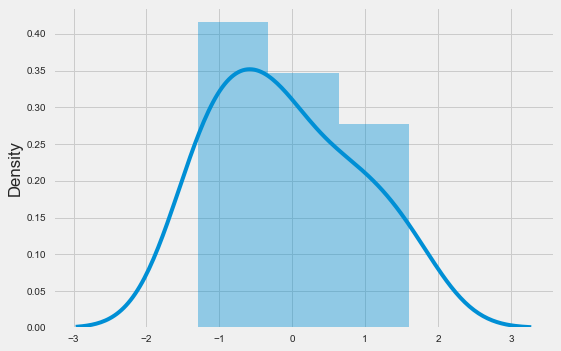

In [15]:
from pyearth import Earth
import seaborn as sns

data['Crop Pot'] = zscore(data['Crop Pot'])
data['GNP'] = zscore(data['GNP'])
data['GDP'] = zscore(data['GDP'])
data['Popul Change'] = zscore(data['Popul Change'])
data['CO2 E'] = zscore(data['CO2 E'])
data['Agri Land'] = zscore(data['Agri Land'])
data['Yearly Rain'] = zscore(data['Yearly Rain'])
data['Exports'] = zscore(data['Exports'])
data['Imports'] = zscore(data['Imports'])

y = data["Crop Pot"].values    
x = data.drop(columns=["Crop Pot"]).values

x_train, x_test, y_train, y_test = train_test_split(    
x, y, test_size=0.4, random_state=1)

ax = sns.distplot(y_train)
plt.show()





Random Forest Regression

Regression Score : 0.9859302124317036
Predicted Values: [-0.63997098 -0.36903436 -0.77650096  1.19309786 -1.12706237 -0.1386533
 -0.85761208 -1.03151262  1.02408097  1.35022412]
MSE 0.17710887861186578
RMSE:  0.4208430569842703
R^2 SCORE: 0.848713722892541


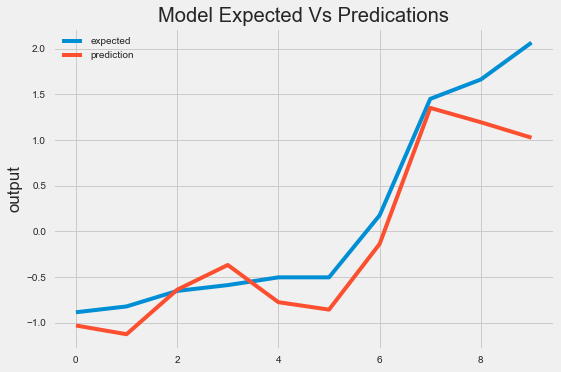

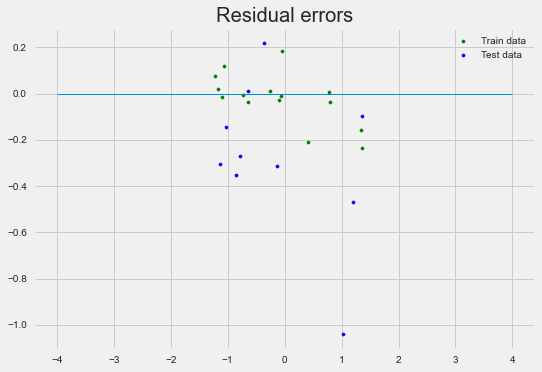

In [16]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import export_graphviz

data['Crop Pot'] = zscore(data['Crop Pot'])
data['GNP'] = zscore(data['GNP'])
data['GDP'] = zscore(data['GDP'])
data['Popul Change'] = zscore(data['Popul Change'])
data['CO2 E'] = zscore(data['CO2 E'])
data['Agri Land'] = zscore(data['Agri Land'])
data['Yearly Rain'] = zscore(data['Yearly Rain'])
data['Exports'] = zscore(data['Exports'])
data['Imports'] = zscore(data['Imports'])

y = data["Crop Pot"].values    
x = data.drop(columns=["Crop Pot"]).values



x_train, x_test, y_train, y_test = train_test_split(    
x, y, test_size=0.4, random_state=1)

regModel = RandomForestRegressor(n_estimators = 100 ,random_state = 1, max_features = 8, criterion = 'mse', bootstrap =True )
regModel.fit(x_train, y_train)


print("Regression Score :", regModel.score(x_train,y_train))
y_pred = regModel.predict(x_test)
print("Predicted Values:",y_pred)
evaluate(regModel,x_test,y_test)



Fitting 4 folds for each of 100 candidates, totalling 400 fits
{'n_estimators': 311, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 110, 'criterion': 'mse', 'bootstrap': True}
MSE 0.17567060244826285
RMSE:  0.41913077010434685
R^2 SCORE: 0.8499422973601188


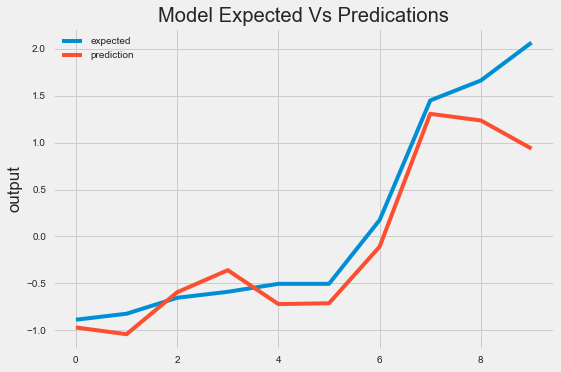

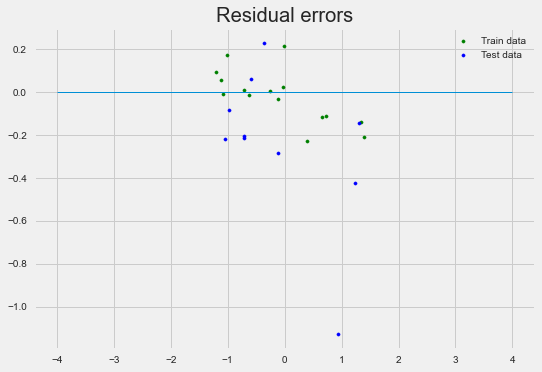

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               "criterion" : ['mse'] 
               }

rf = RandomForestRegressor(max_features = 8, random_state = 1)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 4, verbose=2, random_state=1,n_jobs=-1)
rf_random.fit(x_train, y_train)

print(rf_random.best_params_)
RFA = rf_random.best_estimator_
evaluate(RFA, x_test, y_test)
print("\n")

param_grid = {
                'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion' : ['mse'] 
}




Fitting 4 folds for each of 4320 candidates, totalling 17280 fits
{'bootstrap': True, 'criterion': 'mse', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 311}
MSE 0.17567060244826285
RMSE:  0.41913077010434685
R^2 SCORE: 0.8499422973601188


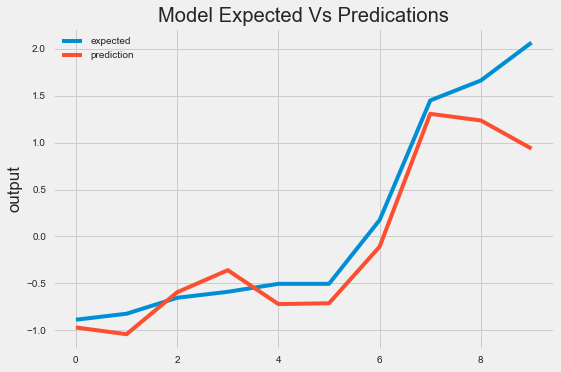

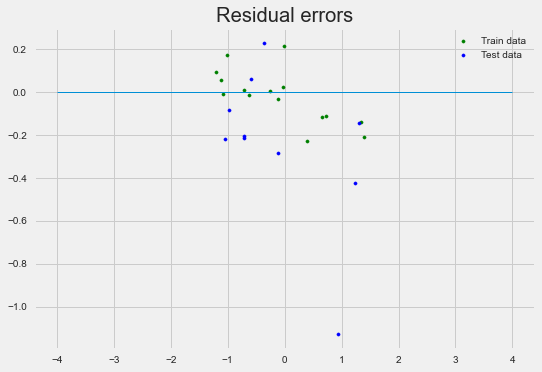

In [18]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 4, verbose = 2,n_jobs=-1)

grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
RFB = grid_search.best_estimator_
evaluate(RFB, x_test, y_test)

Decision Tree Regression

Decision Tree Regression score:  0.9871806457293535
MSE 0.09470147821771316
RMSE:  0.30773605284027605
R^2 SCORE: 0.9191060652158006


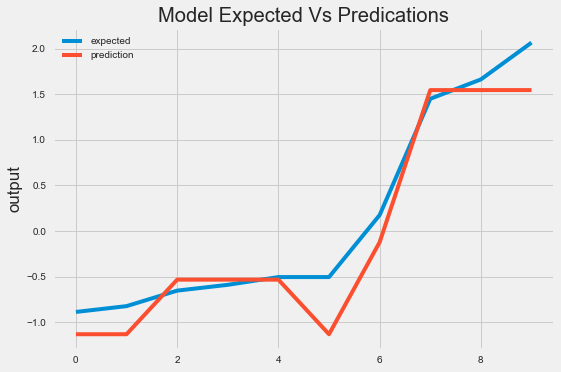

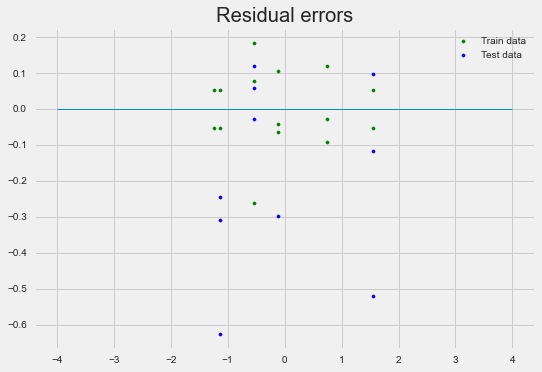

In [19]:
from sklearn.tree import DecisionTreeRegressor

decisonTree = DecisionTreeRegressor(splitter='random',max_depth = 10, min_samples_leaf = 0.1, random_state=1,max_features = 8)
decisonTree.fit(x_train, y_train)

y_pred = decisonTree.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Decision Tree Regression score: ", decisonTree.score(x_train,y_train))
evaluate(decisonTree,x_test,y_test)




Fitting 4 folds for each of 50400 candidates, totalling 201600 fits
C:\Users\Anaconda\envs\tf\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-0.80193991 -0.77860063 -0.80193991 ...         nan         nan
         nan]
  warnings.warn(
C:\Users\Anaconda\envs\tf\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the train scores are non-finite: [-0.1656758 -0.2032863 -0.1656758 ...        nan        nan        nan]
  warnings.warn(
DecisionTreeRegressor(max_depth=3, max_features='auto', max_leaf_nodes=10,
                      min_weight_fraction_leaf=0.1, random_state=1,
                      splitter='random')
MSE 0.13385672850834243
RMSE:  0.3658643580732379
R^2 SCORE: 0.8856596784953373


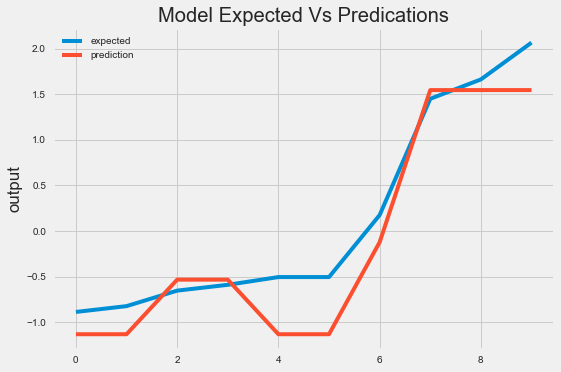

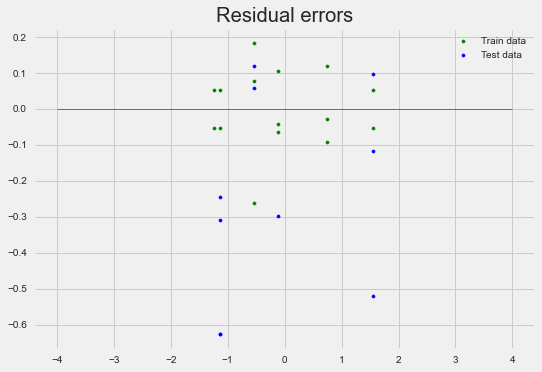

Fitting 4 folds for each of 10 candidates, totalling 40 fits
DecisionTreeRegressor(max_depth=12, max_features='sqrt', max_leaf_nodes=50,
                      min_samples_leaf=8, min_weight_fraction_leaf=0.1,
                      random_state=1)
MSE 1.2242527397378855
RMSE:  1.1064595517857332
R^2 SCORE: -0.04575581238614945
C:\Users\Anaconda\envs\tf\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-0.97483192 -0.97483192 -1.03493614         nan         nan         nan
         nan         nan         nan         nan]
  warnings.warn(
C:\Users\Anaconda\envs\tf\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the train scores are non-finite: [-0.8388993  -0.8388993  -0.65402177         nan         nan         nan
         nan         nan         nan         nan]
  warnings.warn(


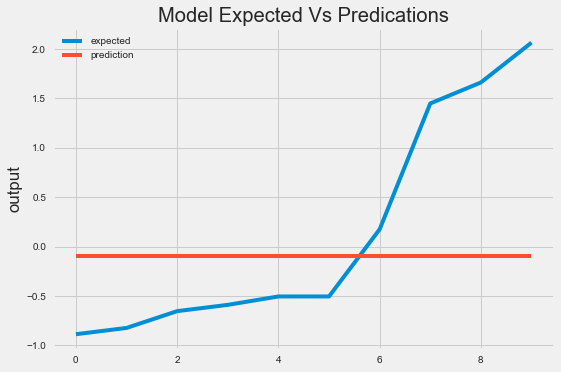

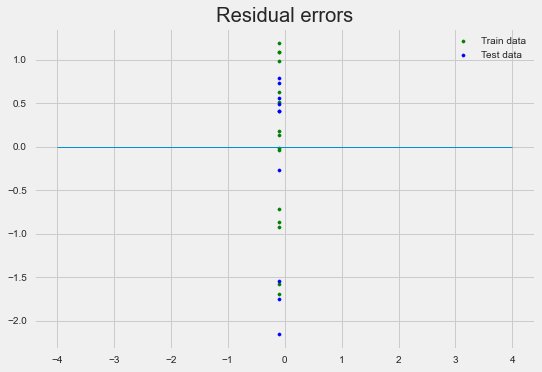

In [20]:

param_grid = {"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90],
           "random_state": [1],
           "criterion" : ['mse'] }

             

modelGrid  = GridSearchCV(DecisionTreeRegressor(), param_grid = param_grid, cv = 4, verbose = 3,scoring="neg_mean_squared_error" ,return_train_score=True,n_jobs=-1)
modelGrid.fit(x_train, y_train)

print(modelGrid.best_estimator_)
DecisionA = modelGrid.best_estimator_
evaluate(DecisionA, x_test, y_test)

modelGrid = RandomizedSearchCV(DecisionTreeRegressor(), param_distributions = param_grid, cv = 4, verbose = 3,scoring="neg_mean_squared_error" ,return_train_score=True,n_jobs=-1)
modelGrid.fit(x_train, y_train)

print(modelGrid.best_estimator_)
DecisionB = modelGrid.best_estimator_
evaluate(DecisionB, x_test, y_test)

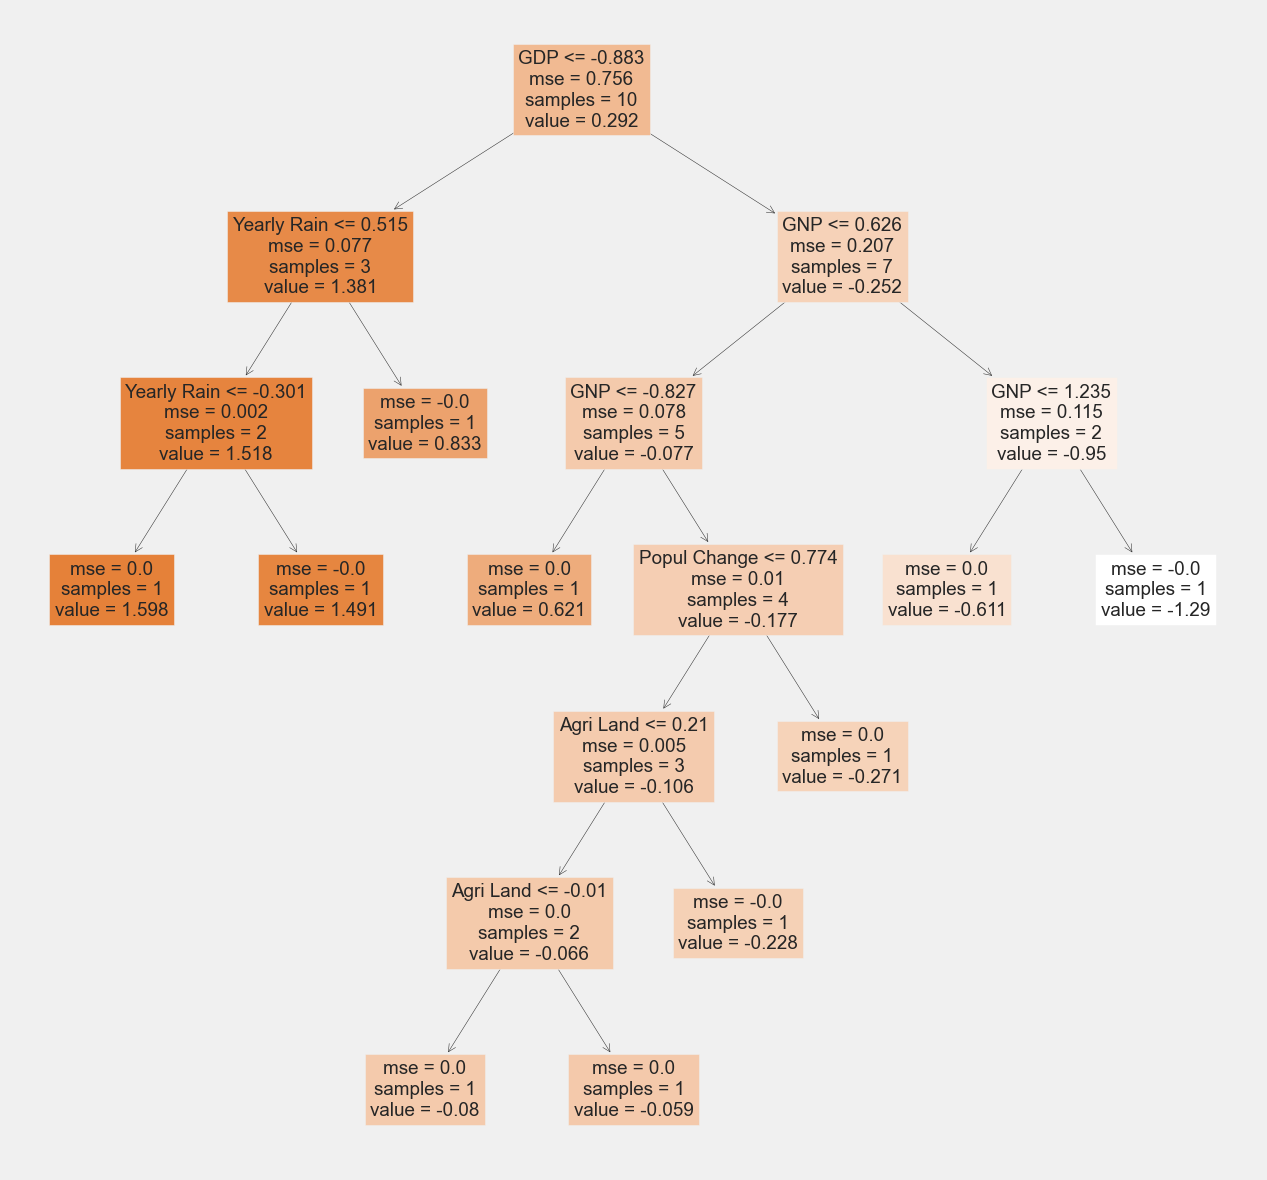

In [21]:
import graphviz


colNames=[
         "GNP",
         "GDP",
         "Popul Change",
         "CO2 E",
         "Agri Land",
         "Yearly Rain",
         "Exports",
         "Imports",
        ]

export_graphviz(DecisionA, out_file="tree.dot", 
                                feature_names=colNames, 
                                filled=True)
with open("tree.dot") as f:
    dot_graph = f.read(

    )
graphviz.Source(dot_graph)


plt.figure(figsize=(20,20))
_ = tree.plot_tree(RFA.estimators_[0], feature_names=colNames , filled=True)


In [24]:
##Model Generalization:



colNames=["Year",
         "Crop Pot",
         "GNP",
         "GDP",
         "Popul Change",
         "CO2 E",
         "Agri Land",
         "Yearly Rain",
         "Exports",
         "Imports",
        ]

data = pd.read_excel(r"C:\Users\Azees Fetuga\Desktop\DA Project\Clustered Dataset.xlsb.xlsx",index_col='Year',names=colNames)

print(data)

data['Crop Pot'] = zscore(data['Crop Pot'])
data['GNP'] = zscore(data['GNP'])
data['GDP'] = zscore(data['GDP'])
data['Popul Change'] = zscore(data['Popul Change'])
data['CO2 E'] = zscore(data['CO2 E'])
data['Agri Land'] = zscore(data['Agri Land'])
data['Yearly Rain'] = zscore(data['Yearly Rain'])
data['Exports'] = zscore(data['Exports'])
data['Imports'] = zscore(data['Imports'])


y = data["Crop Pot"].values    
x = data.drop(columns=["Crop Pot"], axis=1).values

print("Actual Results: ", y)


#MLR
pred = modelA.predict(x)
test_set_rmse = (np.sqrt(mean_squared_error(y, pred)))
test_set_r2 = r2_score(y, pred)
print("\n")
print(pred)
print("MSE", mean_squared_error(y, pred))
print("RMSE: ",test_set_rmse)
print("R^2 SCORE:",test_set_r2)

#RR
pred = ridgeA.predict(x)

test_set_rmse = (np.sqrt(mean_squared_error(y, pred)))
test_set_r2 = r2_score(y, pred)
print("\n")
print(pred)
print("MSE", mean_squared_error(y, pred))
print("RMSE: ",test_set_rmse)
print("R^2 SCORE:",test_set_r2)

#LR
pred = lassoA.predict(x)

test_set_rmse = (np.sqrt(mean_squared_error(y, pred)))
test_set_r2 = r2_score(y, pred)
print("\n")
print(pred)
print("MSE", mean_squared_error(y, pred))
print("RMSE: ",test_set_rmse)
print("R^2 SCORE:",test_set_r2)

#KR
pred = KerasA.predict(x)

test_set_rmse = (np.sqrt(mean_squared_error(y, pred)))
test_set_r2 = r2_score(y, pred)
print("\n")
print(pred)
print("MSE", mean_squared_error(y, pred))
print("RMSE: ",test_set_rmse)
print("R^2 SCORE:",test_set_r2)

#RF
pred = RFA.predict(x)

test_set_rmse = (np.sqrt(mean_squared_error(y, pred)))
test_set_r2 = r2_score(y, pred)
print("\n")
print(pred)
print("MSE", mean_squared_error(y, pred))
print("RMSE: ",test_set_rmse)
print("R^2 SCORE:",test_set_r2)
#DT
pred = DecisionA.predict(x)

test_set_rmse = (np.sqrt(mean_squared_error(y, pred)))
test_set_r2 = r2_score(y, pred)
print("\n")
print(pred)
print("MSE", mean_squared_error(y, pred))
print("RMSE: ",test_set_rmse)
print("R^2 SCORE:",test_set_r2)



      Crop Pot          GNP         GDP  Popul Change    CO2 E   Agri Land  \
Year                                                                         
2006   5864000  2744.002593  44599.6976       0.73505  8.89871  178380.000   
2007   5635000  2915.201470  50566.8266       0.77867  8.61716  176470.000   
2008   5999000  3001.089426  47286.9985       0.78703  8.44003  176840.000   
2009   6396000  2755.449952  38713.1374       0.75639  7.56932  173250.000   
2010   6056000  2620.789578  39435.8399       0.78389  7.84937  172240.000   
2011   6310000  2598.606670  42038.5723       0.78151  7.07317  171640.000   
2012   4553000  2655.755920  42462.7716       0.69535  7.35101  171820.000   
2013   5685000  2737.792697  43444.5330       0.66974  7.10981  172502.000   
2014   5911000  2865.519515  47425.6077       0.73646  6.49734  172320.000   
2015   5588000  2887.670028  44974.8319       0.79237  6.22024  171380.000   
2016   5373000  2818.110960  41064.1334       0.75787  5.77680  